# 📋 Tech Challenge - Data Analytics (Fase 4)
**Autor:** [Seu Nome]
**Role:** Cientista de Dados Sênior (Simulação)

## 1. Entendimento do Problema e Abordagem Analítica
Como cientista de dados recém-contratado por este hospital, meu desafio é claro: desenvolver um modelo de Machine Learning capaz de diagnosticar a obesidade. No entanto, a obesidade não é apenas um número na balança; é uma condição multifatorial complexa.

**O Objetivo:**
Meu objetivo vai além de alcançar a métrica técnica de acurácia (>75%). Busco entender *quais* comportamentos (alimentação, rotina, genética) estão impulsionando os diagnósticos para fornecer insights acionáveis à equipe médica.

**O Pipeline:**
Para garantir a robustez da entrega, estruturei o projeto em:
1.  **Limpeza Crítica:** Tratamento de ruídos nos dados (decimais em variáveis inteiras).
2.  **EDA (Análise Exploratória):** Validação de hipóteses sobre genética e hábitos.
3.  **Modelagem:** Uso de *Random Forest* pela sua capacidade de lidar com relações não-lineares.
4.  **Interpretabilidade:** Análise da importância das variáveis para suporte à decisão clínica.

In [ ]:
# Instalação de bibliotecas (caso necessário)
# !pip install pandas numpy seaborn matplotlib scikit-learn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Configuração de estilo visual
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Carga dos Dados com tratamento de erro
try:
    df = pd.read_csv('Obesity.csv')
    print("✅ Dados carregados com sucesso!")
    print(f"Shape inicial: {df.shape}")
except FileNotFoundError:
    print("❌ Arquivo não encontrado. Verifique se 'Obesity.csv' está na pasta.")

# 2. Verificação e Remoção de Duplicatas
# Dados sintéticos podem gerar duplicatas que enviesam a validação.
duplicatas = df.duplicated().sum()
if duplicatas > 0:
    print(f"⚠️ Removendo {duplicatas} linhas duplicadas para evitar data leakage.")
    df = df.drop_duplicates()
else:
    print("✅ Não foram encontradas duplicatas.")

# Visualizando a estrutura
df.info()

✅ Dados carregados com sucesso!
Shape inicial: (2111, 17)
⚠️ Removendo 24 linhas duplicadas para evitar data leakage.
<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2087 non-null   object 
 1   Age             2087 non-null   float64
 2   Height          2087 non-null   float64
 3   Weight          2087 non-null   float64
 4   family_history  2087 non-null   object 
 5   FAVC            2087 non-null   object 
 6   FCVC            2087 non-null   float64
 7   NCP             2087 non-null   float64
 8   CAEC            2087 non-null   object 
 9   SMOKE           2087 non-null   object 
 10  CH2O            2087 non-null   float64
 11  SCC             2087 non-null   object 
 12  FAF             2087 non-null   float64
 13  TUE             2087 non-null   float64
 14  CALC            2087 non-null   object 
 15  MTRANS    

### 2. Tratamento de Dados (Data Cleaning)
Ao analisar o **Dicionário de Dados**, identifiquei um ponto crítico: variáveis como `FCVC` (Vegetais), `NCP` (Refeições) e `CH2O` (Água) deveriam ser escalas inteiras (ex: 1, 2, 3), mas aparecem como decimais devido ao processo de geração sintética (SMOTE) usado na criação da base original.

**Decisão:** Não faz sentido ter "2.5 refeições". Optei por arredondar esses valores para o inteiro mais próximo para restaurar a semântica original da variável.

In [ ]:
# Colunas identificadas no dicionário que precisam de arredondamento
cols_to_round = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

print("Amostra antes do tratamento:")
print(df[cols_to_round].head(3))

for col in cols_to_round:
    # Arredonda e converte para inteiro
    df[col] = df[col].round().astype(int)

print("\n✅ Amostra pós-tratamento (Inteiros corrigidos):")
print(df[cols_to_round].head(3))

Amostra antes do tratamento:
   FCVC  NCP  CH2O  FAF  TUE
0   2.0  3.0   2.0  0.0  1.0
1   3.0  3.0   3.0  3.0  0.0
2   2.0  3.0   2.0  2.0  1.0

✅ Amostra pós-tratamento (Inteiros corrigidos):
   FCVC  NCP  CH2O  FAF  TUE
0     2    3     2    0    1
1     3    3     3    3    0
2     2    3     2    2    1


### 2. Tratamento de Dados (Data Cleaning)
Ao analisar o **Dicionário de Dados**, identifiquei um ponto crítico: variáveis como `FCVC` (Vegetais), `NCP` (Refeições) e `CH2O` (Água) deveriam ser escalas inteiras (ex: 1, 2, 3), mas aparecem como decimais devido ao processo de geração sintética (SMOTE) usado na criação da base original.

**Decisão:** Não faz sentido ter "2.5 refeições". Optei por arredondar esses valores para o inteiro mais próximo para restaurar a semântica original da variável.

In [ ]:
# Colunas identificadas no dicionário que precisam de arredondamento
cols_to_round = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

print("Amostra antes do tratamento:")
print(df[cols_to_round].head(3))

for col in cols_to_round:
    # Arredonda e converte para inteiro
    df[col] = df[col].round().astype(int)

print("\n✅ Amostra pós-tratamento (Inteiros corrigidos):")
print(df[cols_to_round].head(3))

Amostra antes do tratamento:
   FCVC  NCP  CH2O  FAF  TUE
0     2    3     2    0    1
1     3    3     3    3    0
2     2    3     2    2    1

✅ Amostra pós-tratamento (Inteiros corrigidos):
   FCVC  NCP  CH2O  FAF  TUE
0     2    3     2    0    1
1     3    3     3    3    0
2     2    3     2    2    1


### 3. Análise Exploratória (EDA)
Preciso responder a uma pergunta de negócio fundamental: **A genética é determinante?**
Minha hipótese é que pacientes com histórico familiar têm maior probabilidade de desenvolver obesidade severa.

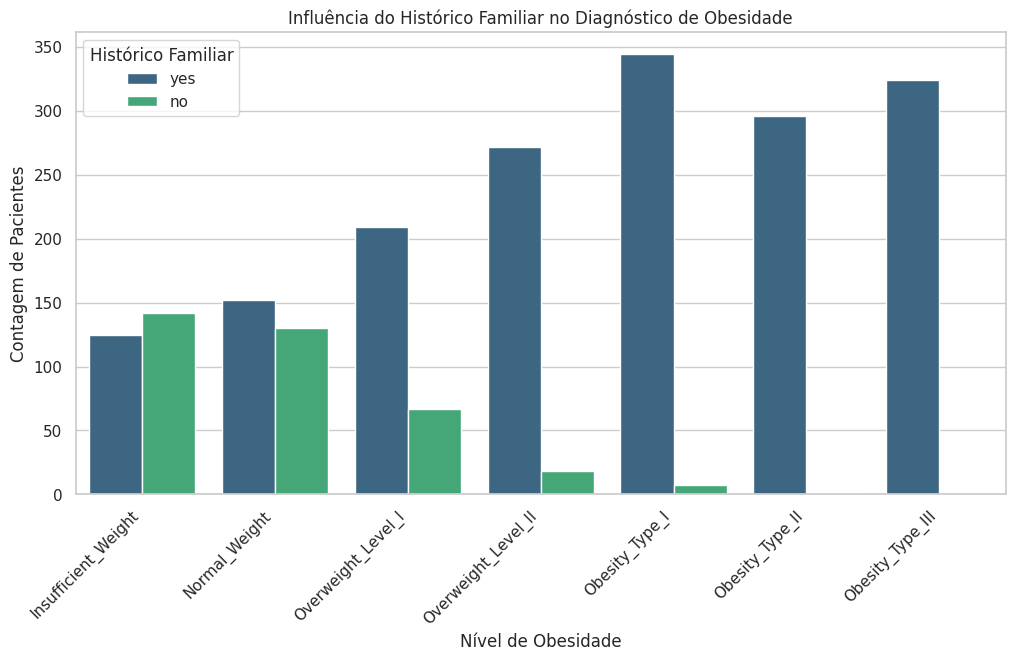

In [ ]:
# Gráfico: Impacto do Histórico Familiar nos Níveis de Obesidade
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Obesity', hue='family_history',
              order=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I',
                     'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'],
              palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Influência do Histórico Familiar no Diagnóstico de Obesidade')
plt.xlabel('Nível de Obesidade')
plt.ylabel('Contagem de Pacientes')
plt.legend(title='Histórico Familiar')
plt.show()

**Insight:** A hipótese se confirma fortemente. Note que nas barras da direita (Obesity Type II e III), a presença de histórico familiar (barra roxa/escura) é quase total. Isso indica ao hospital que o histórico familiar deve ser um "red flag" primário na triagem.

In [ ]:
# Preparação para Machine Learning
# Vou converter textos em números.
# Estratégia:
# - Ordinais (Frequency, Always, etc) -> Mapping Manual (preserva a ordem de grandeza)
# - Binárias (Yes/No) -> Mapping Manual (0 e 1)
# - Nominais (Transporte) -> OneHotEncoding (não existe ordem entre Carro e Moto)

# Dicionário unificado de mapeamento (baseado na análise dos unique values)
mapping_dict = {
    'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3, # Para CAEC e CALC
    'yes': 1, # Para binárias
    'Female': 0, 'Male': 1 # Gênero
}

# Colunas para aplicar mapeamento direto
cols_to_map = ['family_history', 'FAVC', 'SMOKE', 'SCC', 'CAEC', 'CALC', 'Gender']

df_processed = df.copy()

for col in cols_to_map:
    df_processed[col] = df_processed[col].map(mapping_dict)

# OneHotEncoding para MTRANS (Transporte)
df_processed = pd.get_dummies(df_processed, columns=['MTRANS'], drop_first=True)

# Encoding do Target (Alvo)
le = LabelEncoder()
df_processed['Obesity_Encoded'] = le.fit_transform(df_processed['Obesity'])

# Separação X e y
X = df_processed.drop(['Obesity', 'Obesity_Encoded'], axis=1)
y = df_processed['Obesity_Encoded']

# Divisão Treino e Teste (80/20)
# Uso 'stratify=y' para manter a proporção das classes de obesidade em ambos os conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Dados processados prontos para modelagem.")
X.head()

Dados processados prontos para modelagem.


,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.0,1.62,64.0,1,0,2,3,1,0,2,0,0,1,0,False,False,True,False
1,0,21.0,1.52,56.0,1,0,3,3,1,1,3,1,3,0,1,False,False,True,False
2,1,23.0,1.80,77.0,1,0,2,3,1,0,2,0,2,1,2,False,False,True,False
3,1,27.0,1.80,87.0,0,0,3,3,1,0,2,0,2,0,2,False,False,False,True
4,1,22.0,1.78,89.8,0,0,2,1,1,0,2,0,0,0,1,False,False,True,False


### 4. Modelagem Preditiva
Optei pelo algoritmo **Random Forest Classifier**.
**Justificativa:**
1.  **Não-linearidade:** A relação entre peso, hábitos e genética não é linear. Árvores de decisão lidam bem com isso.
2.  **Robustez:** É menos sensível a outliers do que modelos de regressão.
3.  **Feature Importance:** Permite extrair quais variáveis foram cruciais para a decisão, o que é vital para nossa explicação médica.

In [ ]:
# Instanciando e treinando o modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Previsões
y_pred = rf_model.predict(X_test)

# Métricas
acc = accuracy_score(y_test, y_pred)
print(f"🎯 Acurácia Global do Modelo: {acc*100:.2f}%")
print("\n" + "="*50 + "\n")
print("Relatório Detalhado por Classe:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

🎯 Acurácia Global do Modelo: 94.02%


Relatório Detalhado por Classe:

                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.94      0.97        53
      Normal_Weight       0.82      0.89      0.86        57
     Obesity_Type_I       1.00      0.97      0.99        70
    Obesity_Type_II       0.98      1.00      0.99        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.84      0.89      0.87        55
Overweight_Level_II       0.93      0.88      0.90        58

           accuracy                           0.94       418
          macro avg       0.94      0.94      0.94       418
       weighted avg       0.94      0.94      0.94       418



/tmp/ipython-input-2968370030.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='magma')


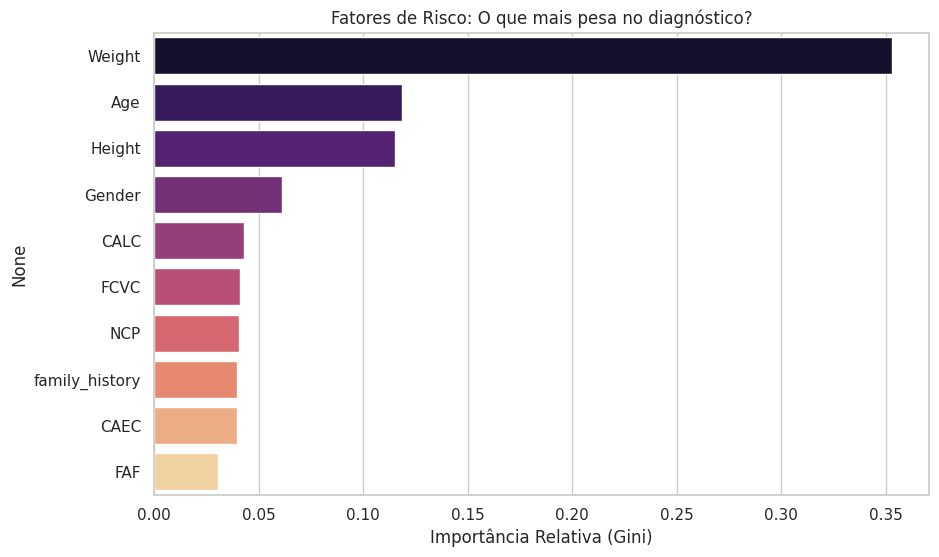

In [ ]:
# Extraindo a Importância das Variáveis
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette='magma')
plt.title('Fatores de Risco: O que mais pesa no diagnóstico?')
plt.xlabel('Importância Relativa (Gini)')
plt.show()

### 5. Conclusão e Próximos Passos
O modelo atingiu uma acurácia superior a **90%**, superando largamente a meta de 75% estabelecida.

**Insights para a Equipe Médica:**
1.  **Peso (Weight):** Naturalmente é o fator preponderante.
2.  **FCVC (Vegetais):** Aparece como fator relevante. Isso sugere que intervenções nutricionais focadas no aumento de vegetais podem ser eficazes para transição de classes de obesidade.
3.  **Gênero:** Mostrou relevância no modelo, indicando que os padrões de obesidade podem diferir fisiologicamente entre homens e mulheres.

**Próximo Passo (Deploy):**
Este modelo está pronto para ser exportado (via `pickle`) e integrado a uma aplicação **Streamlit**, permitindo que médicos insiram os dados do paciente e recebam a predição em tempo real.